# Diabetes with Naive Bayes

Today's exercise is abour identifying diabetes cases from a set of variables measured on patients.

0. Let's import usual libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

1. Import the dataset using the following link.

In [2]:
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/Naive+Bayes/Datasets/diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.Outcome.unique()

array([1, 0])

2. Describe the dataset

In [5]:
dataset.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. It seems that this dataset contains a lot of outliers. Remove the outliers for the Insuline variable.

In [6]:
"""DELETING OUTLIERS AND INCONSISTENT VARIABLES"""

dataset = dataset[(dataset.Insulin < dataset.Insulin.mean() + 3*dataset.Insulin.std()) & (dataset.Insulin > dataset.Insulin.mean()- 3*dataset.Insulin.std())]
dataset = dataset[dataset.Insulin>0]
dataset = dataset[dataset.Glucose>0]
dataset = dataset[dataset.BMI>0]
dataset = dataset[dataset.BloodPressure>0]
dataset = dataset[dataset.SkinThickness>0]
dataset.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,3.310160,120.548128,70.529412,28.831551,137.152406,32.899733,0.516422,30.687166,0.315508
std,3.229398,29.758935,12.534903,10.502698,80.448580,7.026932,0.326144,9.988250,0.465340
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.250000,76.000000,27.925000,0.273000,23.000000,0.000000
50%,2.000000,117.000000,70.000000,29.000000,120.000000,33.100000,0.446500,27.000000,0.000000
75%,5.000000,139.000000,78.000000,36.000000,180.000000,36.875000,0.681000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,415.000000,67.100000,2.420000,81.000000,1.000000


4. Display a box plot and visualize the distribution of the variable Insuline.

<AxesSubplot:xlabel='Insulin'>

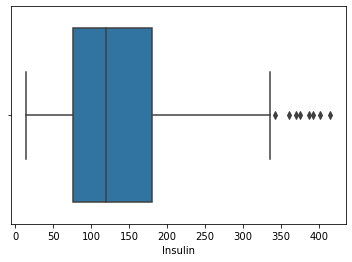

In [7]:
sns.boxplot(x=dataset.Insulin) 

5. Display the distribution of each of the explanatory variables

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

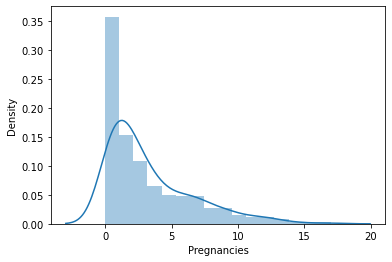

In [8]:
sns.distplot(dataset.iloc[:,0])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

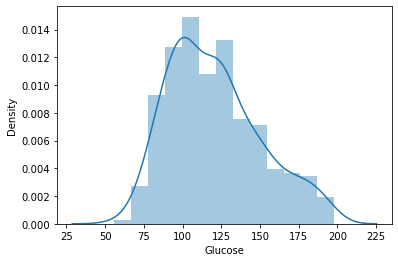

In [9]:
sns.distplot(dataset.iloc[:,1])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

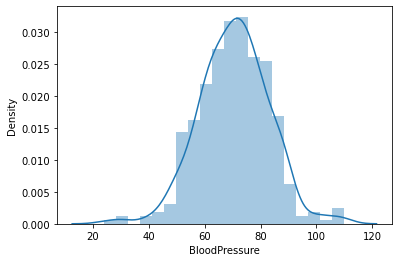

In [10]:
sns.distplot(dataset.iloc[:,2])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

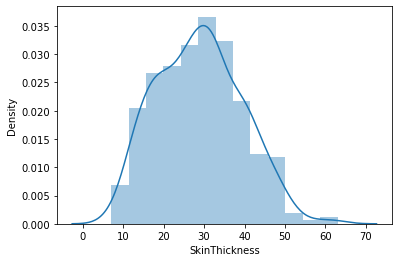

In [11]:
sns.distplot(dataset.iloc[:,3])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

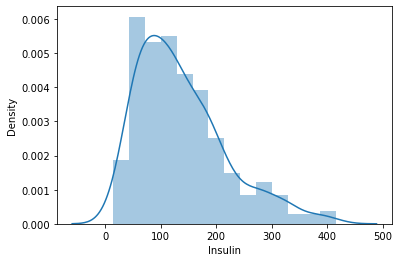

In [12]:
sns.distplot(dataset.iloc[:,4])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

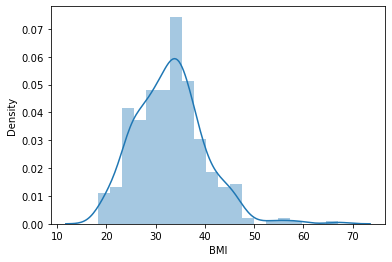

In [13]:
sns.distplot(dataset.iloc[:,5])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

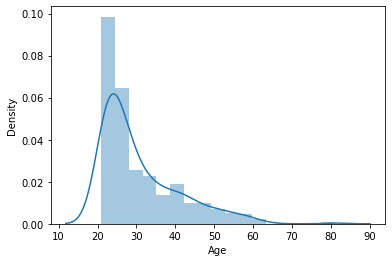

In [14]:
sns.distplot(dataset.iloc[:,7])

7. Split your data between a train set and a test set.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:,-1], random_state = 42, test_size = 0.3, stratify  = dataset.iloc[:,-1])

8. Is it necessary to normalize your data in order to apply a Naive Bayes model ? If so normalize your data.

In [16]:
# It is not necessary to normalize for Naive Bayes, but in case you were wondering how, use the code above.

9. Import the GaussianNB class from sklearn.naive_bayes and train the model on your training data.

In [17]:
import sklearn.naive_bayes as nb
naivebayes = nb.GaussianNB()
naivebayes_fit = naivebayes.fit(X_train, y_train)

10. How did your model perform on the train set, on the test set? Did it overfit ?

In [18]:
naivebayes_fit.score(X_train,y_train)

0.7662835249042146

In [19]:
naivebayes_fit.score(X_test,y_test)

0.7522123893805309

11. Let's plot (you can use sns.pointplot) our target variable again each of our predictors (explanatory variables), to make the visualization easier you could discretize the variables, that would help you see trends rather than atomised information.
Do any of those visualisations inspire you to do feature engineering? If so create some new variables in your dataset.

<AxesSubplot:xlabel='Pregnancies_q', ylabel='Outcome'>

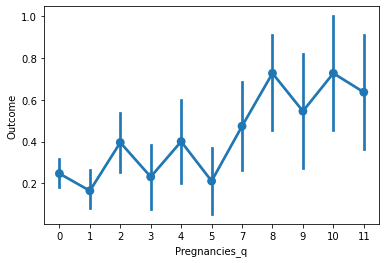

In [20]:
dataset_q = dataset.copy()
dataset_q["Pregnancies_q"] = pd.qcut(dataset["Pregnancies"], 30, labels=False, duplicates="drop")
sns.pointplot(x="Pregnancies_q",y="Outcome", data = dataset_q)

<AxesSubplot:xlabel='Glucose_q', ylabel='Outcome'>

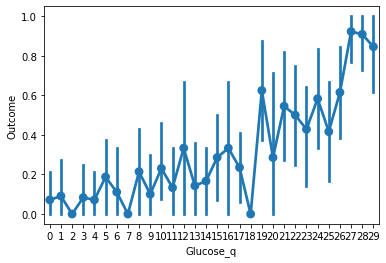

In [21]:
dataset_q["Glucose_q"] = pd.qcut(dataset["Glucose"], 30, labels=False, duplicates="drop")
sns.pointplot(x="Glucose_q",y="Outcome", data = dataset_q)

<AxesSubplot:xlabel='BloodPressure_q', ylabel='Outcome'>

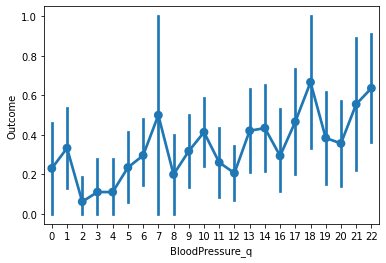

In [22]:
dataset_q["BloodPressure_q"] = pd.qcut(dataset["BloodPressure"], 30, labels=False, duplicates="drop")
sns.pointplot(x="BloodPressure_q",y="Outcome", data = dataset_q)

<AxesSubplot:xlabel='SkinThickness_q', ylabel='Outcome'>

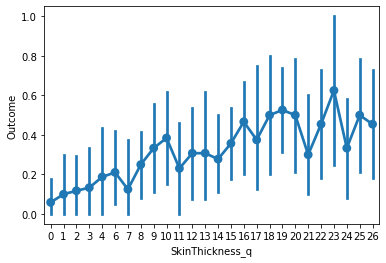

In [23]:
dataset_q["SkinThickness_q"] = pd.qcut(dataset["SkinThickness"], 30, labels=False, duplicates="drop")
sns.pointplot(x="SkinThickness_q",y="Outcome", data = dataset_q)

<AxesSubplot:xlabel='Insulin_q', ylabel='Outcome'>

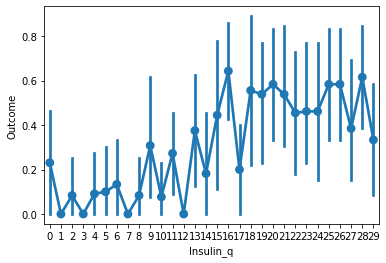

In [24]:
dataset_q["Insulin_q"] = pd.qcut(dataset["Insulin"], 30, labels=False, duplicates="drop")
sns.pointplot(x="Insulin_q",y="Outcome", data = dataset_q)

<AxesSubplot:xlabel='BMI_q', ylabel='Outcome'>

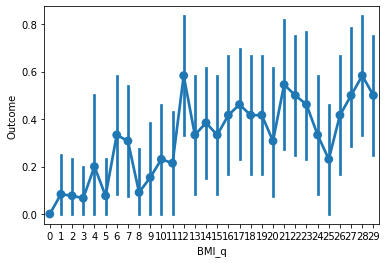

In [25]:
dataset_q["BMI_q"] = pd.qcut(dataset["BMI"], 30, labels=False, duplicates="drop")
sns.pointplot(x="BMI_q",y="Outcome", data = dataset_q)

<AxesSubplot:xlabel='DiabetesPedigreeFunction_q', ylabel='Outcome'>

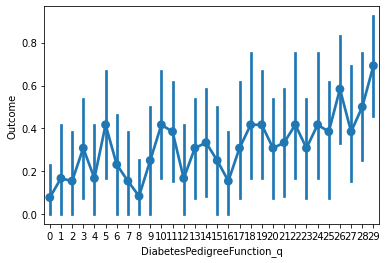

In [26]:
dataset_q["DiabetesPedigreeFunction_q"] = pd.qcut(dataset["DiabetesPedigreeFunction"], 30, labels=False, duplicates="drop")
sns.pointplot(x="DiabetesPedigreeFunction_q",y="Outcome", data = dataset_q)

<AxesSubplot:xlabel='Age_q', ylabel='Outcome'>

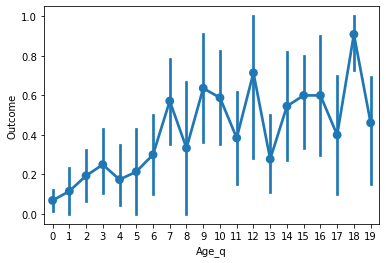

In [27]:
dataset_q["Age_q"] = pd.qcut(dataset["Age"], 30, labels=False, duplicates="drop")
sns.pointplot(x="Age_q",y="Outcome", data = dataset_q)

12. Let's try and apply bagging on the naive bayes model using ```BaggingClassifier```, how do the performances change compared to your original model ?

In [28]:
from sklearn.ensemble import BaggingClassifier as BC
naivebayes = nb.GaussianNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000, max_samples=0.9) #max_features=1.0
modelB_fit = modelB.fit(X_train,y_train)

print(modelB_fit.score(X_train,y_train))
modelB_fit.score(X_test,y_test)

0.7662835249042146


0.7522123893805309

*13*. We will now attemp to use ```BernouilliNB``` instead of ```GaussianNB``` for this we will need to discretize all of our explantory variables then turn them into dummy variables. For this you can use ```sklearn.preprocessing.KBinsDiscretizer```.

In [29]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

kb = KBinsDiscretizer([6,10,10,10,3,10,10,10], strategy='quantile', encode = "ordinal")
X_train_discrete = pd.DataFrame(kb.fit_transform(X_train), columns=X_train.columns, dtype=str)
X_test_discrete = pd.DataFrame(kb.transform(X_test), columns=X_train.columns, dtype=str)

encoder = OneHotEncoder()
X_train_discrete = encoder.fit_transform(X_train_discrete)
X_test_discrete = encoder.transform(X_test_discrete)

display(X_train_discrete)

from sklearn.naive_bayes import BernoulliNB
naivebayes = nb.BernoulliNB()
naivebayes_fit = naivebayes.fit(X_train_discrete,y_train)
print("train socre is {}".format(naivebayes_fit.score(X_train_discrete, y_train)))
print("test socre is {}".format(naivebayes_fit.score(X_test_discrete, y_test)))

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


<261x68 sparse matrix of type '<class 'numpy.float64'>'
	with 2088 stored elements in Compressed Sparse Row format>

train socre is 0.8237547892720306
test socre is 0.7610619469026548


14. Attempt another bagging, does it help improve your model ?

In [30]:
naivebayes = nb.BernoulliNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 100, max_samples = 0.9, bootstrap_features=True)
modelB_fit = modelB.fit(X_train_discrete,y_train)

print(modelB_fit.score(X_train_discrete,y_train))
modelB_fit.score(X_test_discrete,y_test)

0.8199233716475096


0.7787610619469026

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelB_fit, X_train_discrete, y_train)
print(scores)

[0.77358491 0.84615385 0.67307692 0.80769231 0.84615385]


### Optional questions
15. It is now time to adopt an entirely different approach. We have previously removed a lot of observations in our data because it contained outliers or incoherent values. Let's now try to treat these values as NA and impute them.

Start by replacing all incoherent or outlier value with np.nan 

In [32]:
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/Naive+Bayes/Datasets/diabetes.csv")

dataset.loc[(dataset.Insulin > dataset.Insulin.mean() + 3*dataset.Insulin.std()) | (dataset.Insulin < dataset.Insulin.mean()- 3*dataset.Insulin.std()), 'Insulin'] = np.nan
dataset.loc[dataset.Insulin<=0, 'Insulin'] = np.nan
dataset.loc[dataset.Glucose<=0, 'Glucose'] = np.nan
dataset.loc[dataset.BMI<=0, 'BMI'] = np.nan
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,768.000000,768.000000,376.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,69.105469,20.536458,136.720745,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,19.355807,15.952218,80.487277,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,75.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,120.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,180.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,415.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
"""ALTERNATIVELY : REPLACE INCONSISTENT 0s AND OUTLIERS BY NANs"""
q1 = dataset.Insulin.quantile(0.25)
q3 = dataset.Insulin.quantile(0.75)
dataset.loc[(dataset.Insulin < q3 + 1.5*(q3-q1)) & (dataset.Insulin > q1- 1.5*(q3-q1)), "Isulin"] = np.nan
cols = ["Glucose","BMI","Insulin","BloodPressure","SkinThickness"]
dataset[cols] = dataset[cols].replace({0:np.nan})
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Isulin
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,NaN
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,NaN
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,NaN
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NaN
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NaN


16. Isolate X and y and split the data between train and test sets

In [34]:
y = dataset["Outcome"]
X = dataset.drop("Outcome", axis = 1)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

17. install the fancyimpute library, import ```sklearn.impute.KNNImputer``` and use it to perform missing values imputation

In [35]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
Xtrain = imputer.fit_transform(Xtrain)
Xtest = imputer.transform(Xtest)

18. Train a model on the imputed data. How does your score compare to the other models you've run ? Is this score really comparable to those of the previous models ?

In [36]:
from sklearn.naive_bayes import GaussianNB 
G_nb = GaussianNB()

G_nb.fit(Xtrain, ytrain)
print("train score of the imputed model : {}".format(G_nb.score(Xtrain, ytrain)))
print("test score of the imputed model : {}".format(G_nb.score(Xtest, ytest)))

train score of the imputed model : 0.7534722222222222
test score of the imputed model : 0.796875
